In [76]:
import numpy as np
import pandas as pd
import folium
import ipywidgets as widgets
import matplotlib.ticker as ticker
import matplotlib.pyplot as plot
import seaborn as sn

In [77]:
date = "Dec 19th 2022"

I took the list of vendors analysed by the student teams in Spring 2020 as the sample set. You can check the slides which has information about the competitive analysis done by the student teams in this link - https://docs.google.com/presentation/d/1JvqC1JQFRp5-pWBupKWMBPeEMPTqhqKa/edit?usp=sharing&ouid=114651845902974533993&rtpof=true&sd=true. Based on the available data, I did a back of the envelope estimation for all these vendors in this Jupyter Notebook. 

This Jupyter Notebook (based on the inputs of Ryan Lovett) performs basic calculations to estimate the cost University will incur if they plan to chose a vendor offering to deploy Jupyter notebooks taking into mind the current scale and usage of Datahub. I have made certain approximations which I will layout at the end of the notebook. 

All the below estimates are based on the pricing on or before Dec 19th 2022

# Posit (RStudio) Instructor Pays Option

Posit (R Studio) offers 16 GB RAM, 4 CPU and unlimited shared storage as part of the "instructor pays" option. This amounts to $5/student/month Check this link for more details - https://posit.cloud/plans/instructor?option=student

In [78]:
rstudio_user_estimate = 3000 # back of the envelope estimation based on the no. of courses using R Studio currently
rstudio_user_estimate
duration = 12 # 12 months
rstudio_costperuser_permonth = 5 # $5 per user per month
rstudio_instructorpays_year = rstudio_user_estimate * (rstudio_costperuser_permonth * 12)
rstudio_instructorpays_year

180000

# Posit (RStudio) Student Pays Option

At large student base, Posit (RStudio) could potentially offer a 50% discount which amounts to $2.50/student/month. They're more expensive than the "instructor pays" metered pricing, but the costs are fixed as opposed to being based on student/project runtime. In any case, it might be worth it to add them too. Here is the link for more details - https://posit.cloud/plans/instructor?option=student

In [79]:
rstudio_studentpays_costperuser_permonth = 2.5
rstudio_studentpays_year = rstudio_user_estimate * (rstudio_studentpays_costperuser_permonth * 12)
rstudio_studentpays_year

90000.0

### Pros and Cons

Pros: Launches R Studio and Shiny in a sandboxed environment
Cons: Doesn't support Jupyter tools which are used in the majority of the courses. Need to find another vendor to complement this subscription. 
May not work effectively with nbgitpuller link which is used by Berkeley instructors to share Data Science assignment with students (To be verified)

# Cocalc

Cocalc offers 2 GB RAM, 1 CPU and 3 GB shared disk in their plans listed here - https://cocalc.com/pricing/courses
Cocalc plan listed below - 1 Teacher, 150 Students, 120 days Duration, 30min Idle timeout, 2 G Shared RAM,1 core Shared CPU, 3 G Disk space


In [80]:
cocalc_user_estimate = 11000 # Maximum number of users who used Datahub at its peak during FA 22
cocalc_cost_peruser_permonth = 4.45 #1 instructor, 150 students, 4 months
cocalc_cost_year = round(cocalc_user_estimate * (cocalc_cost_peruser_permonth * 12))
cocalc_cost_year

587400

### Pros and Cons

Pros: Supports Jupyter notebook kernels in Python and R
Cons: May not support integration with nbgitpuller. Doesn't support RStudio and linux desktop environment- https://cocalc.com/features/r-statistical-software

# Deep Note

Deepnote for Education is free for all academic users. This estimate makes the assumption - what if it is not? If they start charging as per their current costs for enterprise customers?

They offer 16 GB RAM and 4 CPU in addition to database integrations 

In [81]:
deepnote_user_estimate = 11000
deepnote_cost_peruser_permonth = 39
deepnote_cost_year = round(deepnote_user_estimate * (deepnote_cost_peruser_permonth * 12))
deepnote_cost_year

5148000

Adding a discount of 40% which is a placeholder for discounts companies can offer universities. Cocalc offers a 40% discount which I have taken as a baseline - https://cocalc.com/store/site-license?user=academic&period=monthly&run_limit=1&member=true&uptime=short&cpu=1&ram=2&disk=3

In [82]:
deepnote_cost_year_concession = deepnote_costestimate_year * 0.6
deepnote_cost_year_concession

3088800.0

### Pros and Cons

Pros: Free for all academic users, Can pull notebooks from Google Drive and Github repositories, Supports Posgres and Mongo DB integration
Cons: Doesn't support R Studio, Shiny, nbgitpuller and Linux Desktop Environment

# Github Codespaces

Github Codespaces is free for all academic users.This estimate makes the assumption - what if it is not? If they start charging as per their current costs for enterprise customers?


In [83]:
codespaces_user_estimate = 11000
codespaces_cost_peruser_permonth = 11.70 # $11.70 per developer per month
codespaces_cost_year = round(codespaces_user_estimate * (codespaces_cost_peruser_permonth * 12))
codespaces_cost_year

1544400

Adding a discount of 40% which companies offer universities regularly


In [84]:
codespaces_cost_year_concession = codespaces_costestimate_year * 0.6
codespaces_cost_year_concession

926640.0

### Pros and Cons

Pros: Free for all academic users
Cons: Doesn't seem to support RStudio and Linux Desktop Environment. Unsure about nbgitpuller and database integrations

# Python Anywhere

Python Anywhere is free for all users. https://www.pythonanywhere.com/pricing/ details the pricing for non academic users


In [85]:
pythonanywhere_user_estimate = 11000
pythonanywhere_cost_peruser_permonth = 5
pythonanywhere_cost_year = round(pythonanywhere_user_estimate * (pythonanywhere_cost_peruser_permonth * 12))
pythonanywhere_cost_year

660000

### Pros and Cons
Pros: Free for all academic users
Cons: Cons: Doesn't seem to support RStudio and Linux Desktop Environment. Unsure about nbgitpuller and database integrations

# Ed Discussions

Ed discussions pricing model is not transparent

In [86]:
# Ed discussion
eddiscussion_user_estimate = 11000
eddiscussion_cost_peruser_permonth = 0
eddiscussion_cost_year = round(pythonanywhere_user_estimate * (pythonanywhere_cost_peruser_permonth * 12))
eddiscussion_cost_year

660000

### Pros and Cons
Pros: Ed discussion is extensively used at Berkeley making it a seamless transition. Built Real Time Collaboration functionality as part of their notebooks. Database integration is available
Cons: Their pricing model is not transparent making it hard to make any estimates

# Vocareum

Vocareum Pricing - https://www.vocareum.com/#pricing


In [60]:
Vocareum_user_estimate = 11000
Vocareum_cost_peruser_permonth = 10
Vocareum_cost_year = round(Vocareum_user_estimate * (Vocareum_cost_peruser_permonth * 12))
Vocareum_cost_year

1320000

In [ ]:
### Pros and Cons

# Illumi Desk

Illumi Desk Pricing - https://www.illumidesk.com/pricing


In [61]:
illumidesk_user_estimate = 11000
illumidesk_cost_peruser_permonth = 10
illumidesk_cost_year = round(illumidesk_user_estimate * (illumidesk_cost_peruser_permonth * 12))
illumidesk_cost_year

1320000

In [ ]:
### Pros and Cons

# Datahub

In [63]:
datahub_user_estimate = 11000
datahub_cloudcosts_permonth = 15500 # Based on the current monthly cloud costs
datahub_hrcosts = 25000 # Estimating based on the salary listed in that report
datahub_cost_year = (datahub_cloudcosts_permonth * 12) + (datahub_hrcosts * 12)
datahub_cost_year

486000

Estimate of Datahub Cloud and HR cost (Made based on assumptions from data such as https://hr.berkeley.edu/compensation-benefits/compensation/salary-and-pay/non-represented) 

# Repl.it

repl.it is free for all academic users - https://replit.com/pricing
They offer 2 GB memory, 2 vCPU and 10+ GB storage

In [64]:
replit_user_estimate = 11000
replit_cost_peruser_permonth = 7
replit_cost_year = round(replit_user_estimate * (replit_cost_peruser_permonth * 12))
replit_cost_year

924000

### Pros and Cons

Pros: Free for all academic users. 
Cons: Doesn't seem to support RStudio and Linux Desktop Environment. Unsure about nbgitpuller and database integrations

# eLumin

In [65]:
# elumin - $1500 AWS cloud costs


# 2i2c

In [66]:
# 2i2c pricing

In [73]:
from textwrap import wrap
x_axis = ["R Studio Instructor Pays", "R Studio Student Pays", "Co-Calc", "Deepnote Current Pricing", "Deepnote Predicted Pricing","Codespaces Current Pricing","Codespaces Predicted Pricing", "PythonAnywhere Current Pricing", "PythonAnywhere Predicted Pricing","Ed Discussions" ,"Vocareum", "IllumiDesk", "Datahub", "Repl.it Current Pricing", "Repl.it Predicted Pricing"]
y_axis = [rstudio_instructorpays_year, rstudio_studentpays_year, cocalc_cost_year,0,deepnote_cost_year_concession, 0, codespaces_cost_year_concession, 0 , pythonanywhere_cost_year,0,Vocareum_cost_year,illumidesk_cost_year,datahub_cost_year, 0, replit_cost_year ]
x_axis = [ '\n'.join(wrap(l,10)) for l in x_axis ]
print(y_axis)

[180000, 90000.0, 587400, 0, 3088800.0, 0, 926640.0, 0, 660000, 0, 1320000, 1320000, 486000, 0, 924000]


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


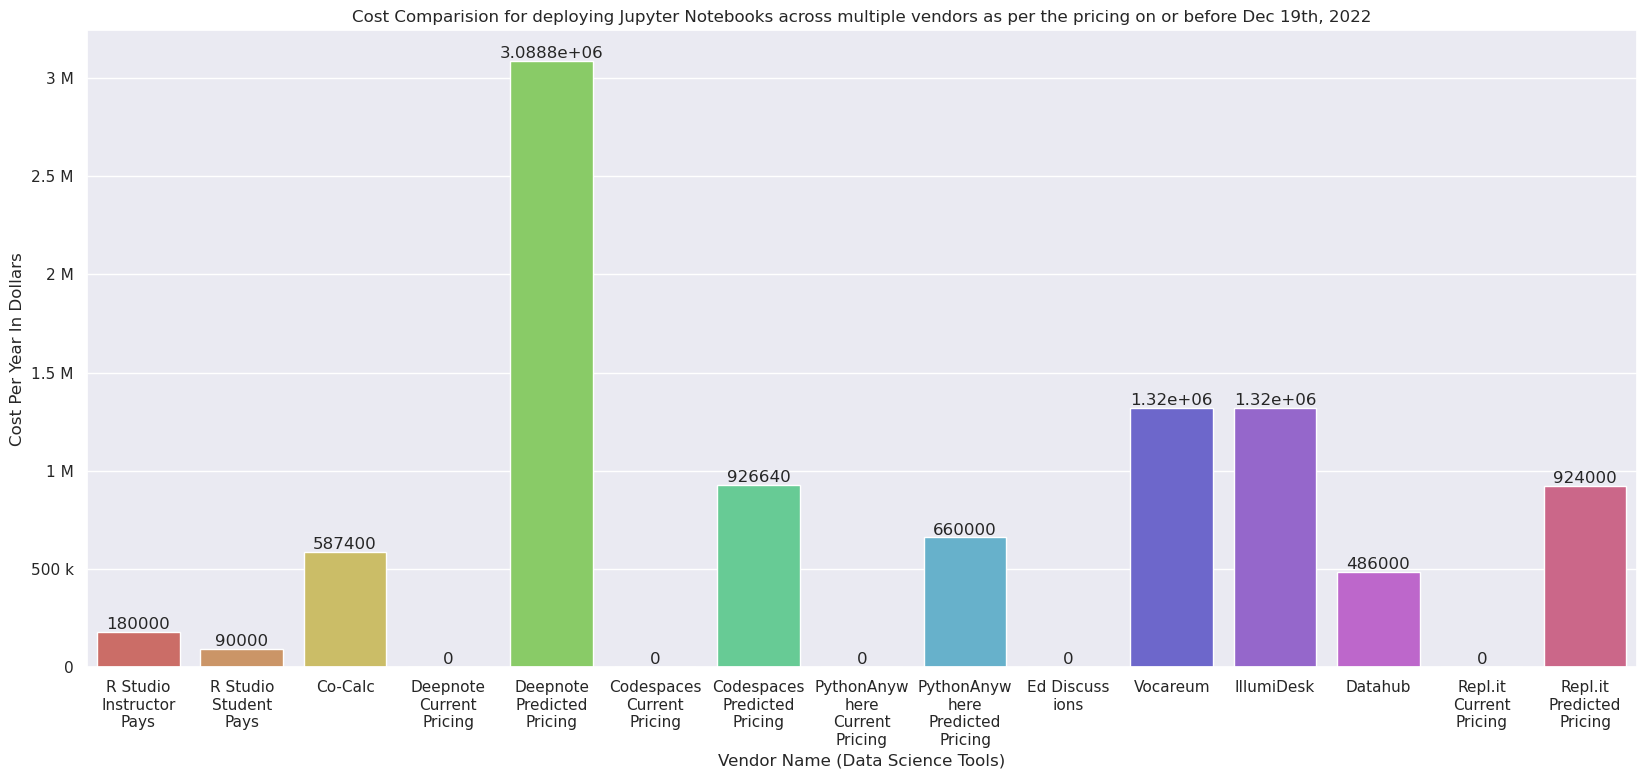

In [74]:
sn.set_style('darkgrid')
sn.set(rc={'figure.figsize':(20,8.27)})
plot.ticklabel_format(style='plain', axis='y')
fig = sn.barplot(x_axis, y_axis, palette ='hls' )
fig.bar_label(fig.containers[0])
fig.set(xlabel = "Vendor Name (Data Science Tools)",ylabel = "Cost Per Year In Dollars", title = "Cost Comparision for deploying Jupyter Notebooks across multiple vendors as per the pricing on or before Dec 19th, 2022")
#fig.yaxis.set_major_formatter('${x:1.0f}')
fig.yaxis.set_major_formatter(ticker.EngFormatter())

There are lot of approximations made in this particular estimate. Deep Note, Github Codespaces and Python Anywhere are free for academic use currently. However, I am assuming that these vendors will try to monetize their offering in the near future. Hence, I approximated the cost to be 60% of what will be paid by the users using the above offering for professional usecases.

# Not so useful visualization

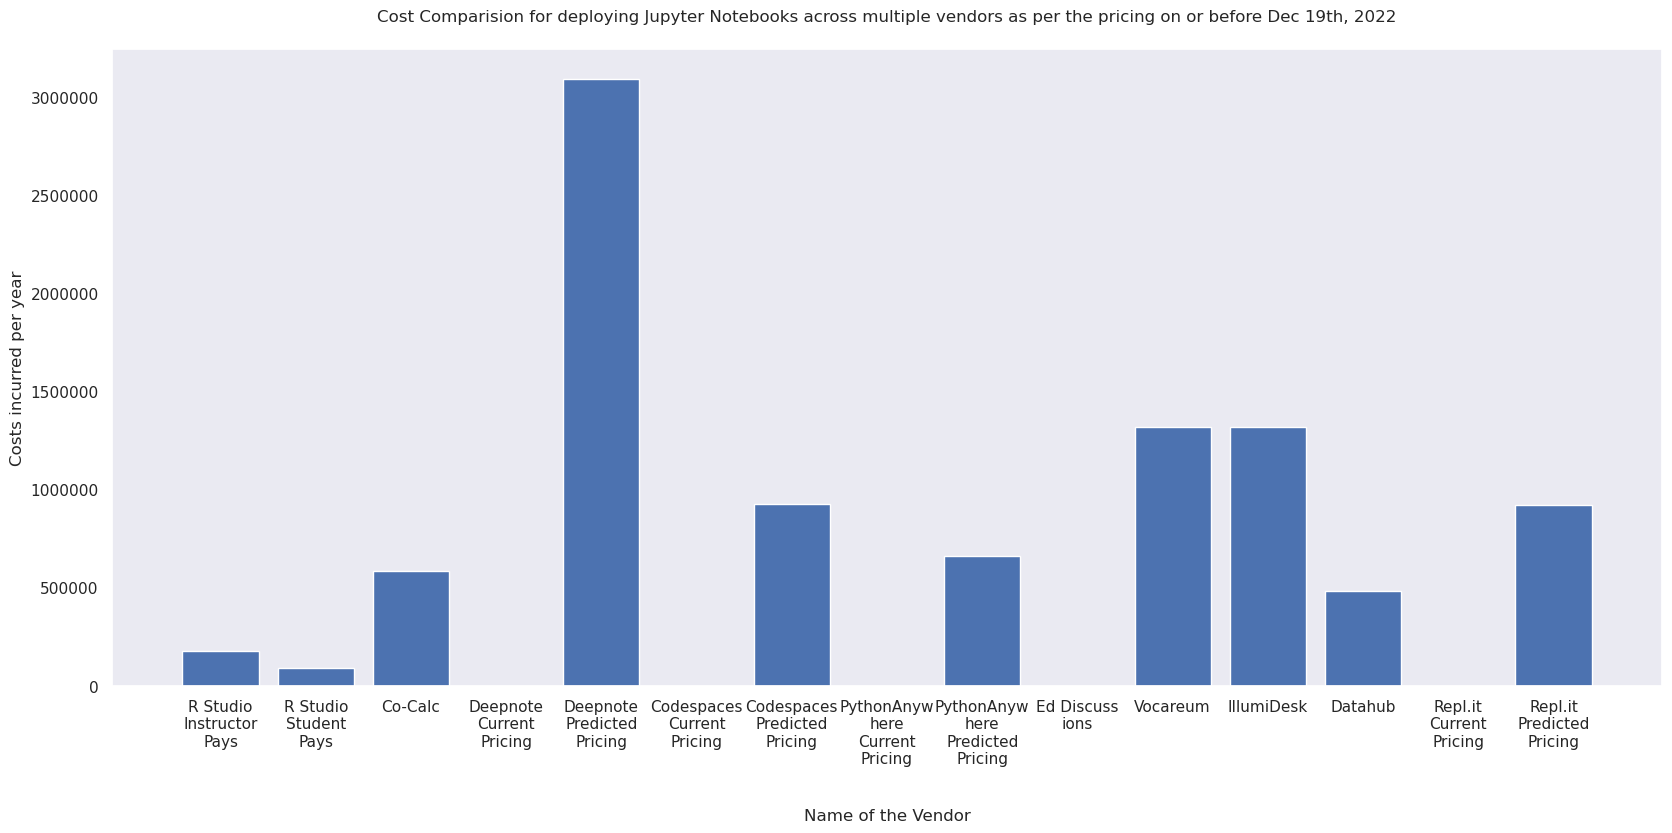

In [75]:
plot.bar(x_axis, y_axis)
plot.title("Cost Comparision for deploying Jupyter Notebooks across multiple vendors as per the pricing on or before Dec 19th, 2022", pad = 20)
plot.xlabel("Name of the Vendor", labelpad=30)
plot.ylabel("Costs incurred per year")
plot.ticklabel_format(style='plain', axis='y')
plot.grid()
plot.show()